# Data Pre-Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

In [2]:
df1 = pd.read_csv("heart.csv")
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}  # Dictionary to store encoders if needed later
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders if you need to decode later

In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [10]:
x, y = df.drop("HeartDisease", axis = 1) , df["HeartDisease"]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state= 42)

In [13]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,1,0,155,342,1,1,150,1,3.0,1
362,56,1,2,155,0,0,2,99,0,0.0,1
869,59,1,2,150,212,1,1,157,0,1.6,2
101,51,1,0,130,179,0,1,100,0,0.0,2
199,57,0,3,130,308,0,1,98,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,2
270,45,1,0,120,225,0,1,140,0,0.0,2
860,60,1,0,130,253,0,1,144,1,1.4,2
435,60,1,0,152,0,0,2,118,1,0.0,2


# Training And Evaluation

In [14]:
# method 1 svc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [15]:
SVC = clf.score(x_test,y_test)
SVC

0.8695652173913043

In [16]:
# upgrade knn classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
KnnClassi = neigh.score(x_test,y_test)
KnnClassi

0.717391304347826

In [18]:
# method2 linear svc
x_tra , y_tra = make_classification(n_features=12, random_state=0)
clf1 = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf1.fit(x_tra, y_tra)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [19]:
clf1.score(x_tra, y_tra)

0.94

In [20]:
clf1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [21]:
Linear_SVC2 = clf1.score(x_test, y_test)
Linear_SVC2

0.8521739130434782

In [22]:
cls = sk.svm.LinearSVC()

In [23]:
cls.fit(x_train, y_train)

LinearSVC()

In [24]:
LinearSvc = cls.score(x_test,y_test)
LinearSvc

0.8521739130434782

In [25]:
# method 3 ensemblers
enGBC = sk.ensemble.GradientBoostingClassifier()
enHBC = sk.ensemble.HistGradientBoostingClassifier()

In [26]:
enGBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [27]:
ENGBC = enGBC.score(x_test,y_test)
ENGBC

0.8608695652173913

In [28]:
enHBC.fit(x_train, y_train)

HistGradientBoostingClassifier()

In [29]:
ENHBC = enHBC.score(x_test,y_test)
ENHBC

0.8739130434782608

In [30]:
# random tree classification
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier()
#SDGclf = sk.linear_model.SGDClassifier()

In [31]:
RFclf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
RFCLF = RFclf.score(x_test,y_test)
RFCLF

0.8739130434782608

In [33]:
ETclf.fit(x_train, y_train)

ExtraTreesClassifier()

In [ ]:
    ETCLF = ETclf.score(x_test,y_test)
    ETCLF

0.8869565217391304

In [35]:
#SDGclf.fit(x_train, y_train)

In [36]:
#SDGCLF = SDGclf.score(x_test,y_test)
#SDGCLF

In [37]:
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [38]:
bagging.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [39]:
BG = bagging.score(x_test,y_test)
BG

0.7608695652173914

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]
eSClf = sk.ensemble.StackingClassifier(estimators)
eSClf.fit(x_train, y_train)

StackingClassifier(estimators=[('ridge', RidgeCV()),
                               ('lasso', LassoCV(random_state=42)),
                               ('knr',
                                KNeighborsRegressor(metric='euclidean',
                                                    n_neighbors=20))])

In [41]:
ESCLF = eSClf.score(x_test,y_test)
ESCLF

0.8521739130434782

In [42]:
# votting
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

LRclf = LogisticRegression(random_state=1)
RFCclf = RandomForestClassifier(n_estimators=100, random_state=1)
GNclf = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', LRclf), ('rf', RFCclf), ('gnb', GNclf)],voting='hard')
for clf, label in zip([LRclf, RFCclf, GNclf, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(RFclf, x, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.82 (+/- 0.03) [Logistic Regression]
Accuracy: 0.84 (+/- 0.04) [Random Forest]
Accuracy: 0.82 (+/- 0.03) [naive Bayes]
Accuracy: 0.83 (+/- 0.04) [Ensemble]


In [43]:
eclf.fit(x_train, y_train)

C:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('gnb', GaussianNB())])

In [44]:
ECLF = eclf.score(x_test,y_test)
ECLF

0.8826086956521739

# Conclusion

In [45]:
Accuracy = pd.DataFrame({"Classifier":["Linear SVC","KneighbourClassification", "SVC",
                                       "GradientBoostingClassifier","HistGradientBoostingClassifier",
                                      "RandomForestClassifier","ExtraTreesClassifier",
                                      "Bagging", "StackingClassifier", "VotingClassifier" ],
              "Score":[LinearSvc,KnnClassi, SVC , ENGBC, ENHBC, RFCLF, ETCLF, BG, ESCLF, ECLF]})
Accuracy

,Classifier,Score
0,Linear SVC,0.852174
1,KneighbourClassification,0.717391
2,SVC,0.869565
3,GradientBoostingClassifier,0.860870
4,HistGradientBoostingClassifier,0.873913
5,RandomForestClassifier,0.873913
6,ExtraTreesClassifier,0.886957
7,Bagging,0.760870
8,StackingClassifier,0.852174
9,VotingClassifier,0.882609


In [46]:
Accuracy.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10.0,0.843043,0.05689,0.717391,0.852174,0.865217,0.873913,0.886957


In [47]:
Accuracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Classifier  10 non-null     object 
 1   Score       10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [48]:
max_score = Accuracy.Score.idxmax()
max_score

6

In [49]:
max_Classifier = Accuracy.loc[max_score]
max_Classifier

Classifier    ExtraTreesClassifier
Score                     0.886957
Name: 6, dtype: object

# EDA Visualization

In [50]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [51]:
corr = df.corr()
corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


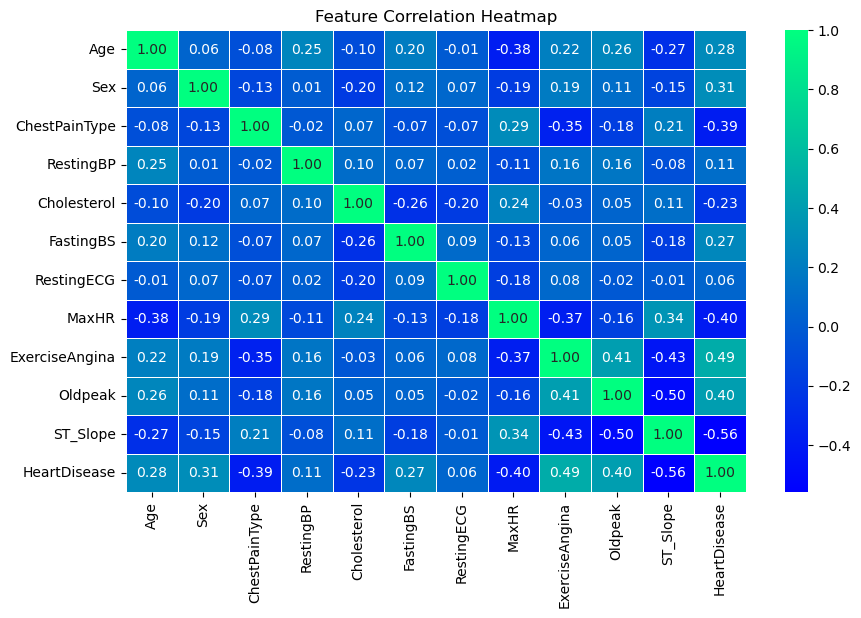

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr, cmap="winter", annot=True, fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()


In [53]:
df.shape

(918, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [56]:
yes = df[df["HeartDisease"] ==1]
yes

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,0,2,160,180,0,1,156,0,1.0,1,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1
8,37,1,0,140,207,0,1,130,1,1.5,1,1
11,58,1,1,136,164,0,2,99,1,2.0,1,1
13,49,1,0,140,234,0,1,140,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1


In [57]:
Yes = yes.describe().T
Yes

,count,mean,std,min,25%,50%,75%,max
Age,508.0,55.899606,8.727056,31.0,51.0,57.0,62.00,77.0
Sex,508.0,0.901575,0.298182,0.0,1.0,1.0,1.00,1.0
ChestPainType,508.0,0.448819,0.876686,0.0,0.0,0.0,0.00,3.0
RestingBP,508.0,134.185039,19.828685,0.0,120.0,132.0,145.00,200.0
Cholesterol,508.0,175.940945,126.391398,0.0,0.0,217.0,267.00,603.0
FastingBS,508.0,0.334646,0.472332,0.0,0.0,0.0,1.00,1.0
RestingECG,508.0,1.021654,0.662852,0.0,1.0,1.0,1.00,2.0
MaxHR,508.0,127.655512,23.386923,60.0,112.0,126.0,144.25,195.0
ExerciseAngina,508.0,0.622047,0.485354,0.0,0.0,1.0,1.00,1.0
Oldpeak,508.0,1.274213,1.151872,-2.6,0.0,1.2,2.00,6.2


In [ ]:
    no = df[df["HeartDisease"] == 0]
    no

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,1,1,130,221,0,0,163,0,0.0,2,0
904,56,1,1,120,240,0,1,169,0,0.0,0,0
906,55,0,1,132,342,0,1,166,0,1.2,2,0
910,41,1,1,120,157,0,1,182,0,0.0,2,0


In [59]:
No = no.describe().T
No

,count,mean,std,min,25%,50%,75%,max
Age,410.0,50.551220,9.444915,28.0,43.00,51.0,57.00,76.0
Sex,410.0,0.651220,0.477167,0.0,0.00,1.0,1.00,1.0
ChestPainType,410.0,1.192683,0.889738,0.0,0.00,1.0,2.00,3.0
RestingBP,410.0,130.180488,16.499585,80.0,120.00,130.0,140.00,190.0
Cholesterol,410.0,227.121951,74.634659,0.0,197.25,227.0,266.75,564.0
FastingBS,410.0,0.107317,0.309894,0.0,0.00,0.0,0.00,1.0
RestingECG,410.0,0.948780,0.589070,0.0,1.00,1.0,1.00,2.0
MaxHR,410.0,148.151220,23.288067,69.0,134.00,150.0,165.00,202.0
ExerciseAngina,410.0,0.134146,0.341226,0.0,0.00,0.0,0.00,1.0
Oldpeak,410.0,0.408049,0.699709,-1.1,0.00,0.0,0.60,4.2


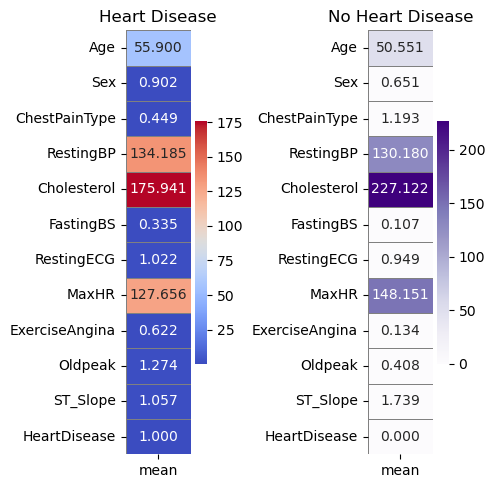

In [60]:
fig, ax  = plt.subplots(nrows = 1,ncols = 2, figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Yes[["mean"]],annot = True, cmap = 'coolwarm', linecolor = "grey",linewidth = .4,  fmt = '.3f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(No[['mean']],annot = True, cmap = 'Purples', linecolor = 'grey',linewidth = .4, fmt = '.3f')
plt.title('No Heart Disease')

fig.tight_layout(pad = 1.15)
plt.show()

In [61]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [62]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [63]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [65]:
import plotly.express as px

In [66]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df1, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [67]:
fig=px.histogram(df1,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [68]:
fig=px.histogram(df1,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [ ]:
fig=px.histogram(df1,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

<Figure size 1500x1000 with 0 Axes>

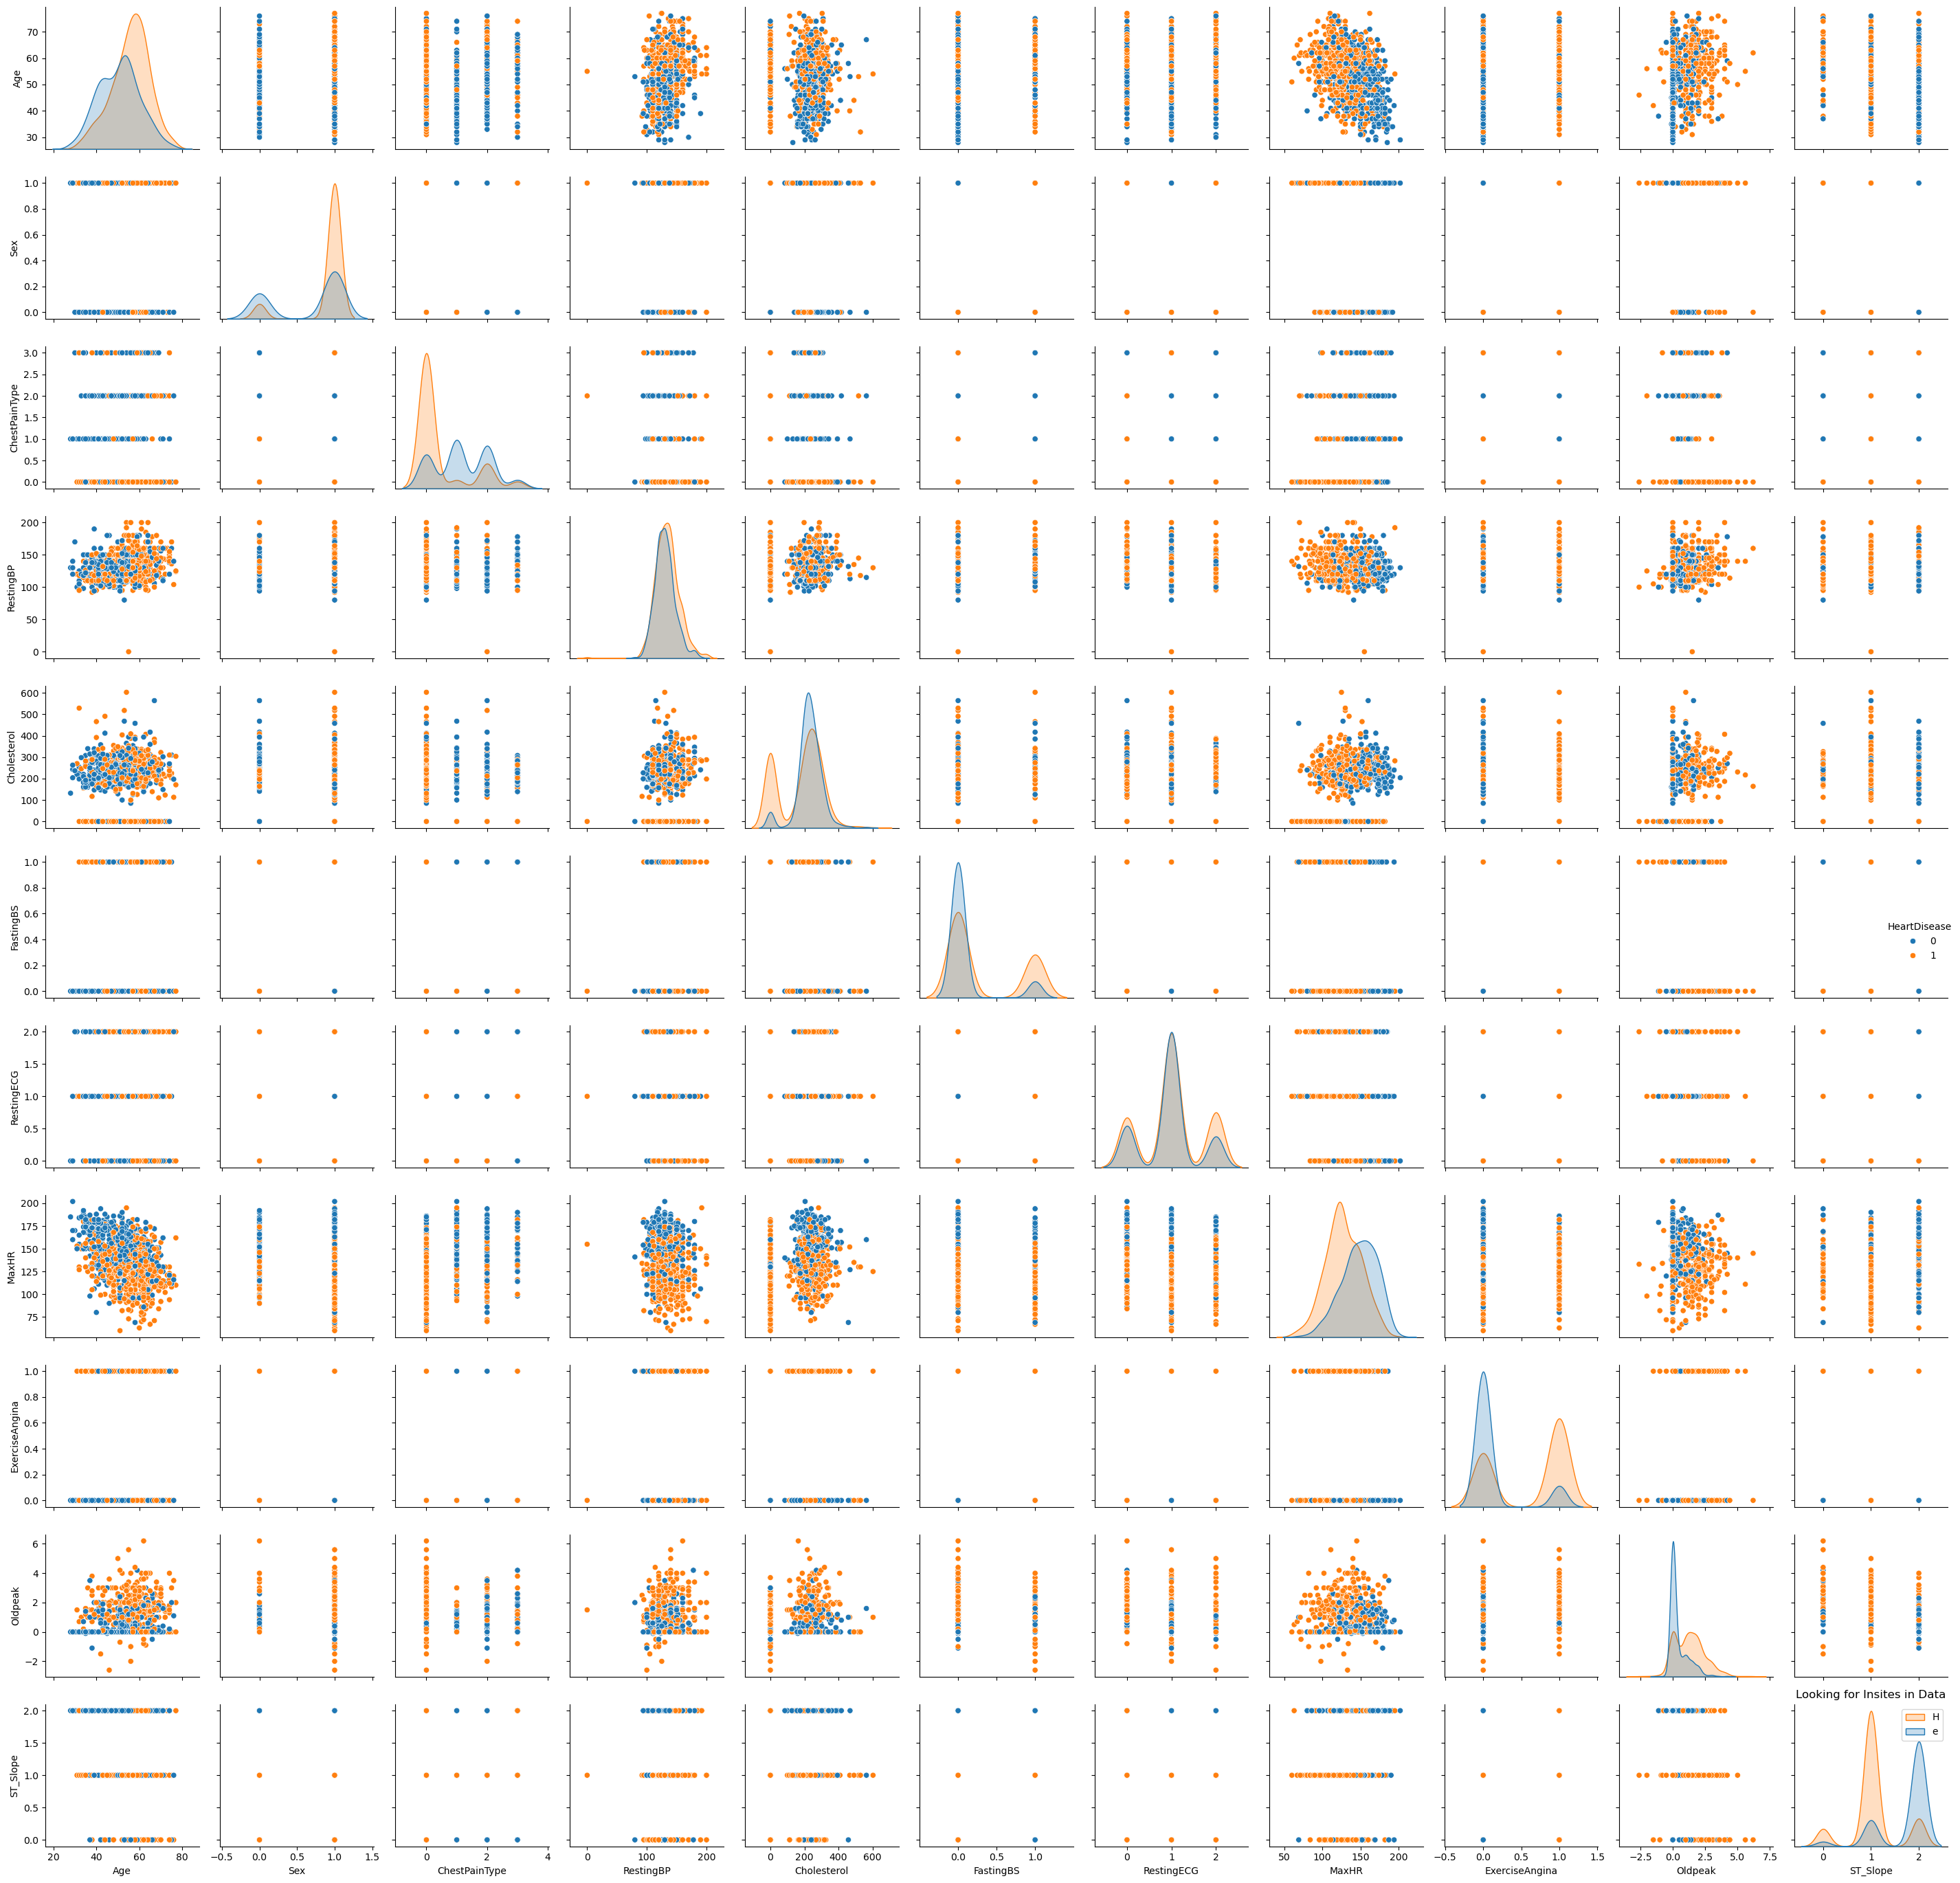

In [70]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()
plt.show()

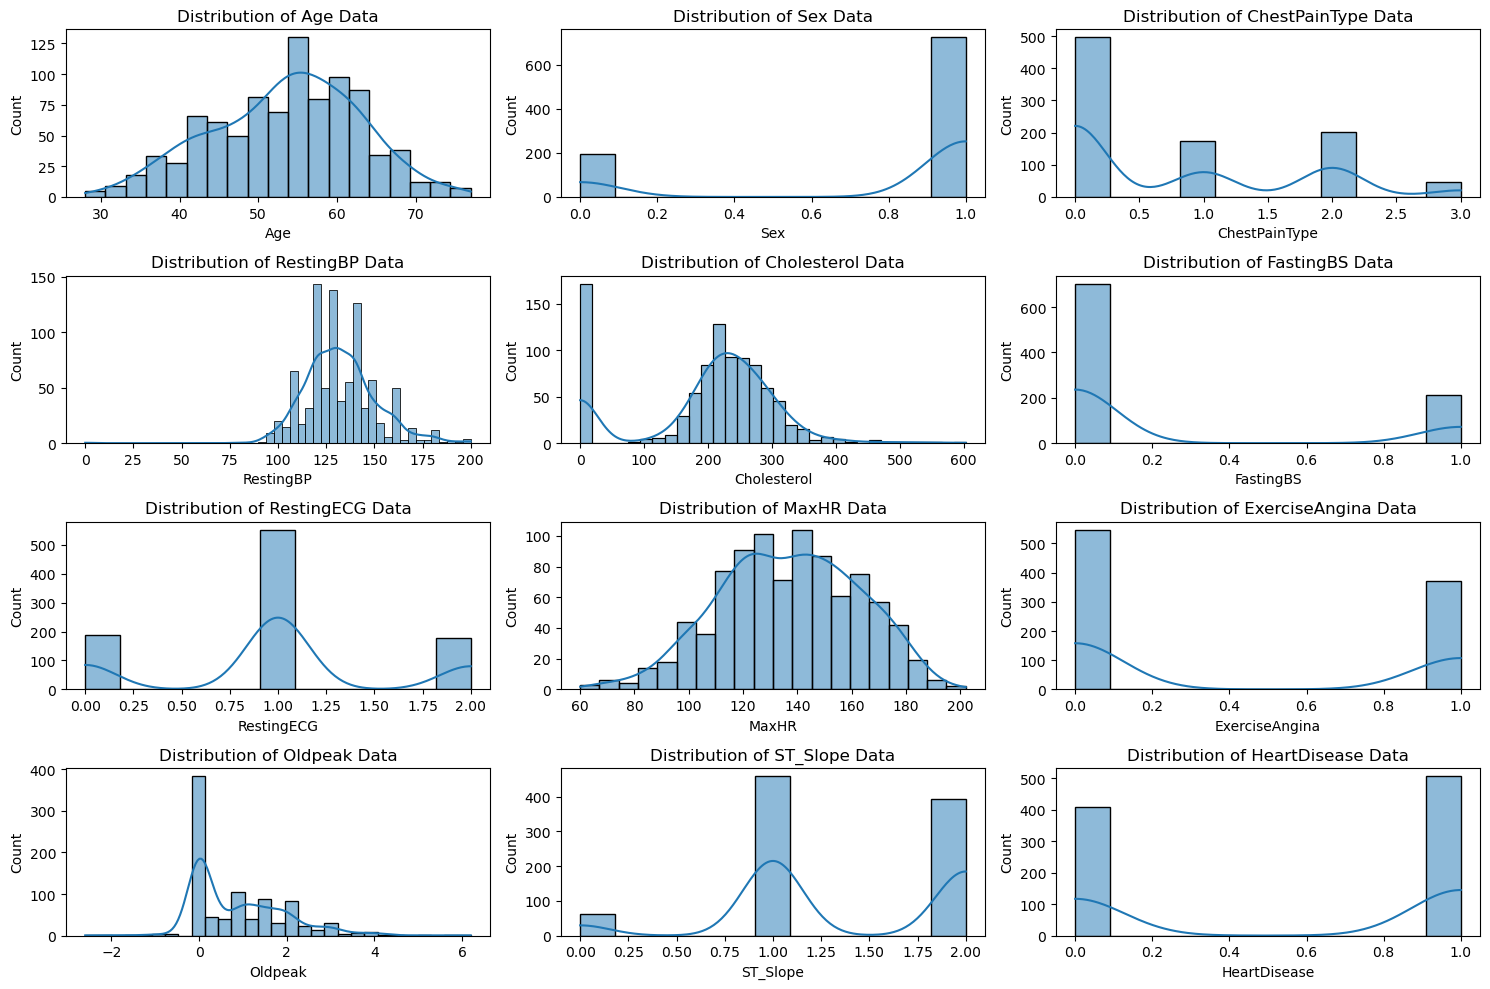

In [71]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show() 

In [72]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [73]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [74]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [75]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [76]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [77]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

In [78]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [87]:
fig = px.imshow(df.corr(), showscale=True )
fig

TypeError: imshow() got an unexpected keyword argument 'showscale'

In [84]:
import plotly.graph_objects as go
import numpy as np

# Generate a 5x5 random matrix
data = np.random.rand(5, 5)

# Create a heatmap with annotations
fig = go.Figure(data=go.Heatmap(
    z=data,  # Data for heatmap
    text=np.round(data, 2),  # Annotate with rounded values
    texttemplate="%{text}",  # Format text display
    colorscale="Viridis",
    showscale=True  # Show color scale bar
))

fig.update_layout(title="Heatmap with Annotations")
fig.show()

In [100]:
fig = go.Figure(data=go.Heatmap(
    z=df.values,  # Matrix of values
    x=df.columns,  # Column labels
    #y=[f"Patient {i}" for i in range(len(df))],  # Row labels
    y = df.columns,
    text=df.values,  # Annotations (raw values)
    texttemplate="%{text}",  # Show raw values as text
    colorscale="Viridis",  # Color scheme
    showscale=True  # Show color bar
))

fig.update_layout(
    title="Heart Disease Dataset Heatmap Record of Patients",
    xaxis_title="Features",
    yaxis_title="Patients"
)

fig.show()


In [93]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [94]:
corr_matrix = df.corr()

In [101]:
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Correlation values
    x=corr_matrix.columns,  # Column labels
    y=corr_matrix.index,  # Row labels
    text=np.round(corr_matrix.values, 3),  # Round values for annotation
    texttemplate="%{text}",  # Show values as text
    colorscale="RdBu",  # Diverging color scale (blue for negative, red for positive)
    zmin=-1, zmax=1,  # Normalize to -1 to 1 range
    showscale=True  # Show color scale bar
))

fig.update_layout(
    title="Correlation Matrix Heatmap",
    #xaxis_title="Features",
    #yaxis_title="Features"
)

fig.show()
